In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [18]:
covid_df =pd.read_csv("D:/covid_19_data_Bangladesh.csv")

In [19]:
covid_df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,4127,3/8/2020,NaN,Bangladesh,2020-03-08T10:53:02,3,0,0
1,4386,3/9/2020,NaN,Bangladesh,2020-03-08T10:53:02,3,0,0
2,4659,3/10/2020,NaN,Bangladesh,2020-03-10T06:19:32,3,0,0
3,4878,3/11/2020,NaN,Bangladesh,2020-03-10T06:19:32,3,0,0
4,5099,3/12/2020,NaN,Bangladesh,2020-03-10T06:19:32,3,0,0
5,5225,3/13/2020,NaN,Bangladesh,2020-03-11T20:00:00,3,0,0
6,5573,3/14/2020,NaN,Bangladesh,2020-03-13T22:22:02,3,0,0
7,5817,3/15/2020,NaN,Bangladesh,2020-03-15T18:20:18,5,0,0
8,6071,3/16/2020,NaN,Bangladesh,2020-03-16T14:38:45,8,0,2
9,6351,3/17/2020,NaN,Bangladesh,2020-03-17T12:13:16,10,0,3


In [20]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              63 non-null     int64  
 1   ObservationDate  63 non-null     object 
 2   Province/State   0 non-null      float64
 3   Country/Region   63 non-null     object 
 4   Last Update      63 non-null     object 
 5   Confirmed        63 non-null     int64  
 6   Deaths           63 non-null     int64  
 7   Recovered        63 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.1+ KB


In [21]:
covid_df.describe()

,SNo,Province/State,Confirmed,Deaths,Recovered
count,63.000000,0.0,63.000000,63.000000,63.000000
mean,13069.142857,NaN,2689.396825,61.809524,222.952381
std,5643.000088,NaN,3995.656535,72.620280,531.940587
min,4127.000000,NaN,3.000000,0.000000,0.000000
25%,8075.000000,NaN,36.000000,3.500000,5.000000
50%,12900.000000,NaN,218.000000,20.000000,33.000000
75%,17861.000000,NaN,4437.500000,129.000000,110.000000
max,22848.000000,NaN,13770.000000,214.000000,2414.000000


In [22]:
covid_df.drop(["SNo", "Province/State", "Country/Region", "Last Update"], inplace = True, axis=1)

In [23]:
covid_df.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,3/8/2020,3,0,0
1,3/9/2020,3,0,0
2,3/10/2020,3,0,0
3,3/11/2020,3,0,0
4,3/12/2020,3,0,0


In [24]:
covid_df['Active_Cases']=covid_df['Confirmed']-(covid_df['Recovered']+covid_df['Deaths'])
covid_df.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Active_Cases
58,5/5/2020,10929,183,1403,9343
59,5/6/2020,11719,186,1403,10130
60,5/7/2020,12425,199,1910,10316
61,5/8/2020,13134,206,2101,10827
62,5/9/2020,13770,214,2414,11142


In [25]:
statewise=pd.pivot_table(covid_df, values=["Confirmed", "Deaths", "Recovered"], 
index="ObservationDate", aggfunc=max)
statewise["Recovery Rate"]=statewise["Recovered"]*100/statewise["Confirmed"]
statewise["Mortality Rate"]=statewise["Deaths"]*100/statewise["Confirmed"]
statewise=statewise.sort_values(by = "Confirmed", ascending=False)
statewise.style.background_gradient(cmap="gist_gray")

,Confirmed,Deaths,Recovered,Recovery Rate,Mortality Rate
ObservationDate,,,,,
5/9/2020,13770,214,2414,17.530864,1.554103
5/8/2020,13134,206,2101,15.996650,1.568448
5/7/2020,12425,199,1910,15.372233,1.601610
5/6/2020,11719,186,1403,11.972011,1.587166
5/5/2020,10929,183,1403,12.837405,1.674444
5/4/2020,10143,182,1209,11.919550,1.794341
5/3/2020,9455,177,1063,11.242729,1.872025
5/2/2020,8790,175,177,2.013652,1.990899
5/1/2020,8238,170,174,2.112163,2.063608


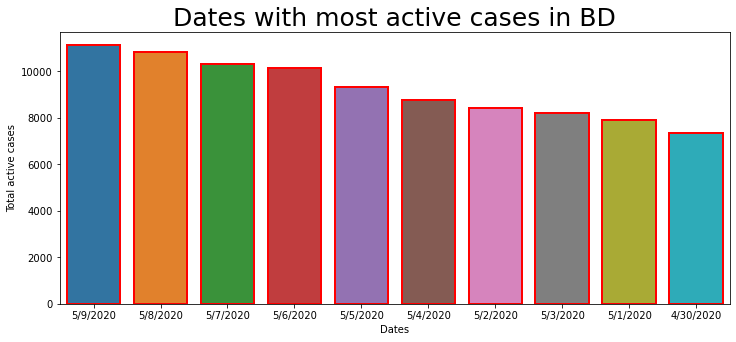

In [26]:
#10 dates based on the number of active cases
top_10_active_cases = covid_df.groupby(by = 'ObservationDate').max()[['Active_Cases','Recovered']].sort_values(by= ['Active_Cases'], ascending = False).reset_index()
fig=plt.figure(figsize=(12,5))
plt.title("Dates with most active cases in BD",size=25)
ax=sns.barplot(data=top_10_active_cases.iloc[:10],y="Active_Cases", x="ObservationDate", linewidth=2,edgecolor='red')
plt.xlabel("Dates")
plt.ylabel("Total active cases")
plt.show()

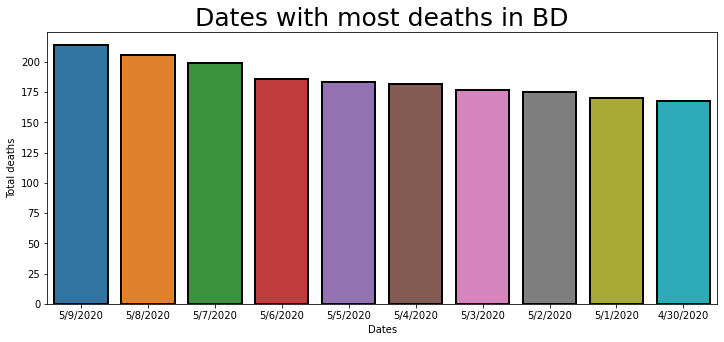

In [27]:
top_10_active_cases = covid_df.groupby(by = 'ObservationDate').max()[['Deaths','Recovered']].sort_values(by= ['Deaths'], ascending = False).reset_index()
fig=plt.figure(figsize=(12,5))
plt.title("Dates with most deaths in BD",size=25)
ax=sns.barplot(data=top_10_active_cases.iloc[:10],y="Deaths", x="ObservationDate", linewidth=2,edgecolor='black')
plt.xlabel("Dates")
plt.ylabel("Total deaths")
plt.show()

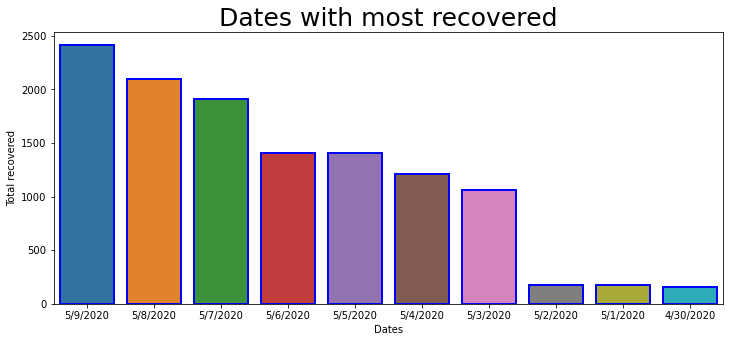

In [28]:
top_10_active_cases = covid_df.groupby(by = 'ObservationDate').max()[['Recovered','Deaths']].sort_values(by= ['Recovered'], ascending = False).reset_index()
fig=plt.figure(figsize=(12,5))
plt.title("Dates with most recovered",size=25)
ax=sns.barplot(data=top_10_active_cases.iloc[:10],y="Recovered", x="ObservationDate", linewidth=2,edgecolor='blue')
plt.xlabel("Dates")
plt.ylabel("Total recovered")
plt.show()

Text(0.5, 1.0, '5 Most Affected dates in BD')

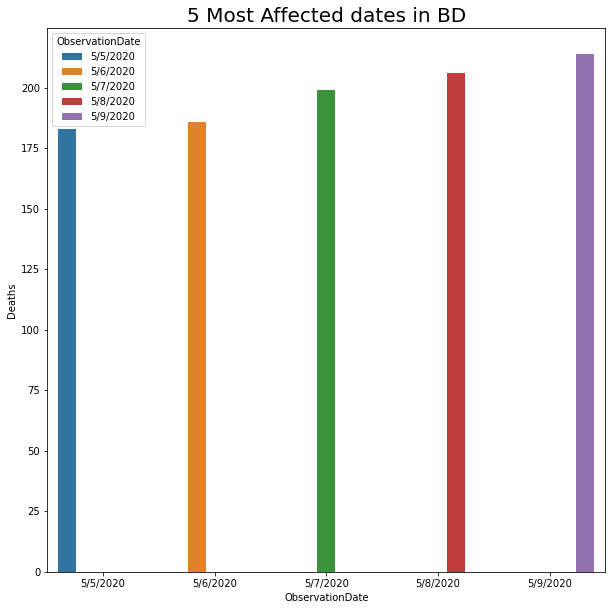

In [29]:
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(data = covid_df[covid_df['ObservationDate'].isin(['5/9/2020','5/8/2020','5/7/2020','5/6/2020','5/5/2020'])],x = 'ObservationDate',y = 'Deaths',hue = 'ObservationDate')
ax.set_title("5 Most Affected dates in BD",size=20)

Text(0.5, 1.0, '5 most confirmed cases in BD')

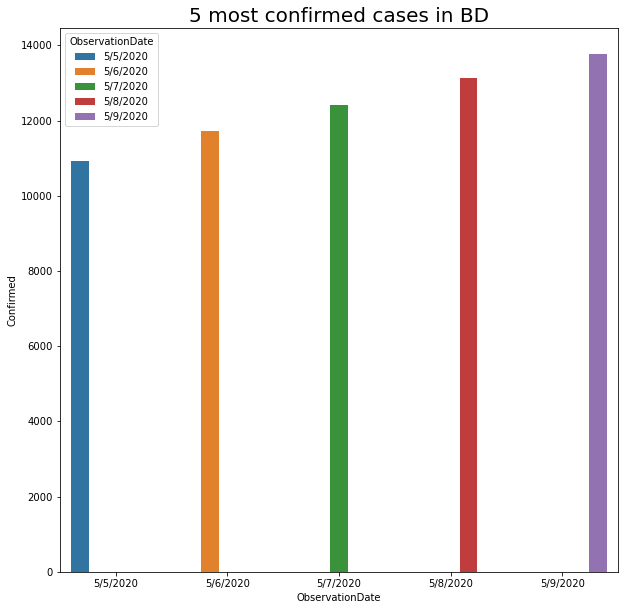

In [30]:
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(data = covid_df[covid_df['ObservationDate'].isin(['5/9/2020','5/8/2020','5/7/2020','5/6/2020','5/5/2020'])],x = 'ObservationDate',y = 'Confirmed',hue = 'ObservationDate')
ax.set_title("5 most confirmed cases in BD",size=20)